So far you have seen the SVC linear algorithm defining a line of separation that was intended to split the two classes. There are also more complex SVC algorithms that can establish curves (2D) or curved surfaces (3D) based on the same principles of maximizing the distances between the points closest to the surface. Let’s see the system
using a polynomial kernel.
As the name implies, you can define a polynomial curve that separates the area decision in two portions. The degree of the polynomial can be defined by the degree option. Even in this case C is the coefficient of regularization. So try to apply an SVC algorithm with a polynomial kernel of third degree and with a C coefficient equal to 1.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


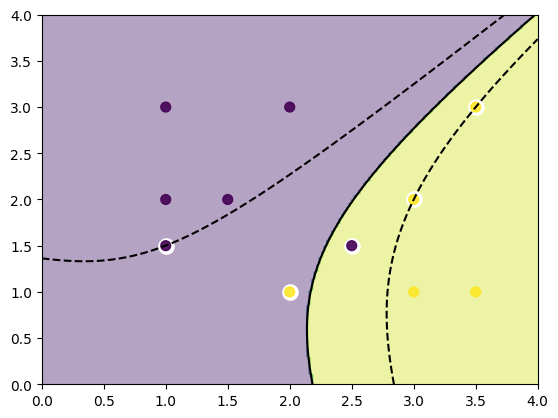

In [4]:
x = np.array([[1,3],[1,2],[1,1.5],[1.5,2],[2,3],[2.5,1.5],
              [2,1],[3,1],[3,2],[3.5,1],[3.5,3]])
y = [0]*6 + [1]*5
svc = svm.SVC(kernel='poly',C=1, degree=3).fit(x,y)
X,Y = np.mgrid[0:4:200j,0:4:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_
[:,1],s=120,facecolors='w')
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)

Another type of nonlinear kernel is the Radial Basis Function (RBF). In this case the separation curves tend to define the zones radially with respect to the observation points of the training set.

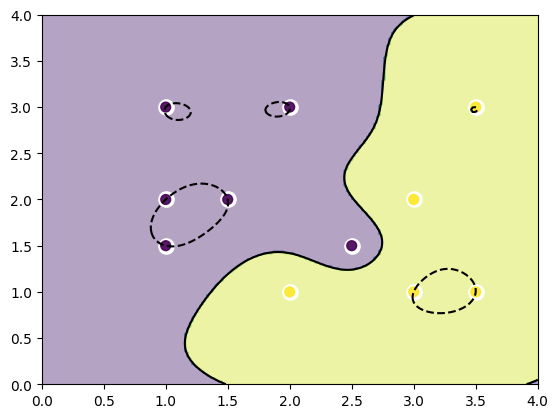

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
x = np.array([[1,3],[1,2],[1,1.5],[1.5,2],[2,3],[2.5,1.5],
     [2,1],[3,1],[3,2],[3.5,1],[3.5,3]])
y = [0]*6 + [1]*5
svc = svm.SVC(kernel='rbf', C=1, gamma=3).fit(x,y)
X,Y = np.mgrid[0:4:200j,0:4:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_
[:,1],s=120,facecolors='w')
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)

Plotting Different SVM Classifiers Using the Iris Dataset

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

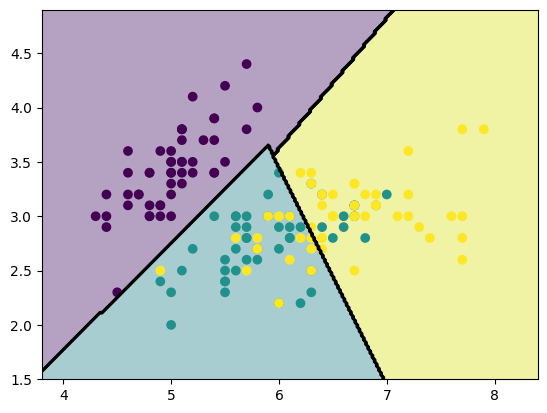

In [16]:
iris = datasets.load_iris()
x = iris.data[:,:2]
y = iris.target
h = .5
svc = svm.SVC(kernel='linear', C=1.0).fit(x,y)
x_min, x_max = x[:,0].min() - .5, x[:,0].max() + .5
y_min, y_max = x[:,1].min() - .5, x[:,1].max() + .5
h = .02
X,Y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svc.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X, Y, Z, alpha=0.4)
plt.contour(X,Y,Z,colors='k')
plt.scatter(x[:,0],x[:,1],c=y)

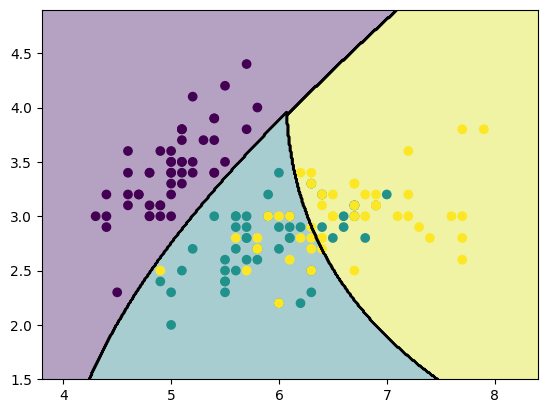

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
iris = datasets.load_iris()
x = iris.data[:,:2]
y = iris.target
h = .05
svc = svm.SVC(kernel='poly', C=1.0, degree=3).fit(x,y)
x_min, x_max = x[:,0].min() - .5, x[:,0].max() + .5
y_min, y_max = x[:,1].min() - .5, x[:,1].max() + .5
h = .01
X, Y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svc.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z, alpha=0.4)
plt.contour(X,Y,Z,colors='k')
plt.scatter(x[:,0],x[:,1],c=y)

Now you can apply the RBF kernel to see the difference in the distribution of areas.
svc = svm.SVC(kernel='rbf', gamma=3, C=1.0).fit(x,y)

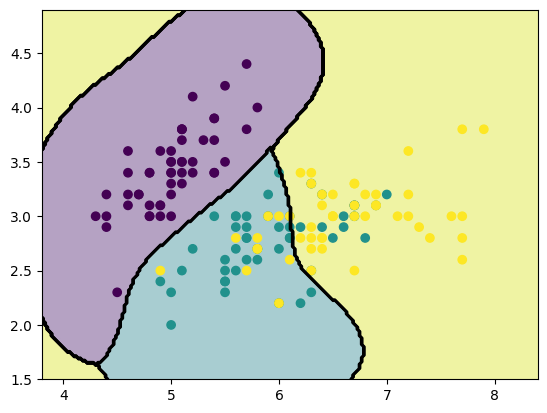

In [35]:
iris = datasets.load_iris()
x = iris.data[:,:2]
y = iris.target
h = .5
svc = svm.SVC(kernel='rbf', gamma=3, C=1).fit(x,y)
x_min, x_max = x[:,0].min() - .5, x[:,0].max() + .5
y_min, y_max = x[:,1].min() - .5, x[:,1].max() + .5
h = .02
X,Y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svc.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X, Y, Z, alpha=0.4)
plt.contour(X,Y,Z,colors='k')
plt.scatter(x[:,0],x[:,1],c=y)